# データ取得

In [36]:
import tcx2df

path_tcx_file = 'data/hiking_20210306.tcx'
#tcxファイルに対する前処理と読み込み
path_new = tcx2df.tcx_file_convert(path_tcx_file)
xml_data = open(path_new).read()
df = tcx2df.xml2df(xml_data)
df = tcx2df.pp_data(df)

In [37]:
df.head()

,Time,Latitude,Longitude,Altitude,Distance,HeartRate
0,2021-03-06 06:31:47,33.623375,130.524748,28.019199,0.00,94.0
1,2021-03-06 06:31:52,33.623375,130.524748,27.951611,1.07,96.0
2,2021-03-06 06:31:57,33.623375,130.524748,27.884023,5.88,96.0
3,2021-03-06 06:32:02,33.623375,130.524748,27.816434,13.10,100.0
4,2021-03-06 06:32:07,33.623375,130.524748,27.748846,20.92,104.0


# 描画

In [38]:
import folium

# 地図オブジェクトを作成
m = folium.Map(location=[df["Latitude"].min(), df["Longitude"].min()], zoom_start=11)
df_lat_lon = df[['Latitude', 'Longitude']]
locs = df_lat_lon.values
folium.PolyLine(locs,color='red').add_to(m)
m

# EDA

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

In [42]:
#1秒あたりの移動距離を算出
df['Distance_before'] = list(pd.concat([pd.Series([0]),df['Distance'][:-1]]))
df['speed'] = df['Distance'] - df['Distance_before']

#1秒あたりの高低差を算出
df['Altitude_before'] = list(pd.concat([pd.Series([0]),df['Altitude'][:-1]]))
df['diff_altitude'] = df['Altitude'] - df['Altitude_before']
df.loc[0, 'diff_altitude'] = 0

#1秒あたりの勾配を算出
df['slope'] = df['diff_altitude'] / df['speed']

df = df.drop(['Distance_before', 'Altitude_before'], axis=1)

In [43]:
df.head()

,Time,Latitude,Longitude,Altitude,Distance,HeartRate,speed,diff_altitude,slope
0,2021-03-06 06:31:47,33.623375,130.524748,28.019199,0.00,94.0,0.00,0.000000,NaN
1,2021-03-06 06:31:52,33.623375,130.524748,27.951611,1.07,96.0,1.07,-0.067588,-0.063167
2,2021-03-06 06:31:57,33.623375,130.524748,27.884023,5.88,96.0,4.81,-0.067588,-0.014052
3,2021-03-06 06:32:02,33.623375,130.524748,27.816434,13.10,100.0,7.22,-0.067588,-0.009361
4,2021-03-06 06:32:07,33.623375,130.524748,27.748846,20.92,104.0,7.82,-0.067588,-0.008643


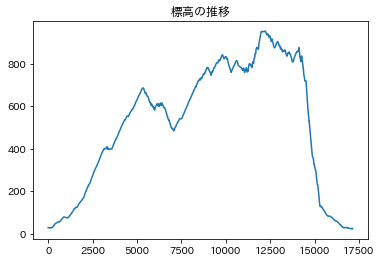

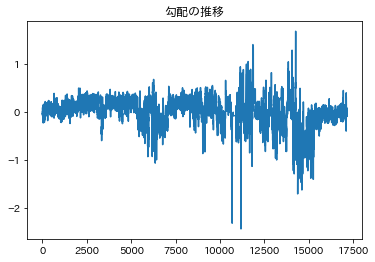

In [50]:
plt.plot(df['Altitude'])
plt.title('標高の推移')
plt.show()

plt.plot(df['diff_altitude'])
plt.title('勾配の推移')
plt.show()

+ 登りは緩やかだが、下りは急だったことがわかる